# Fetal Health Classifier

In the area of medical, featal health is vital for the well-being of unborn childern.It assures to highlight the potential issue during pregnancy which can significantly impact the medical decisions.This project is dedicated to to fetal health classification,focusing on evaluation and various machine learning models.
First we start from data exploration and preprocissing and some feature engineering.Then it delves on differnet machine learning model such as linear and non-linear models.
Linear classifiers, such as Logistic Regression and Support Vector Machines (SVMs), are employed initially to establish a baseline for model performance. Non-linear classifiers, including Random Forest, Decision Trees, and XGBoost, are subsequently explored to potentially improve classification accuracy.

Grid search techniques are utilized to fine-tune hyperparameters and optimize the models. The project emphasizes the importance of evaluating model performance using metrics such as accuracy, confusion matrices, and classification reports.

The notebook also explores ensemble methods like AdaBoost and Voting, combining the strength of multiple classifiers to further enhance classification accuracy.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv(r"C:\Users\Dell\Documents\fetal_health.csv")
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


<Axes: xlabel='fetal_health', ylabel='count'>

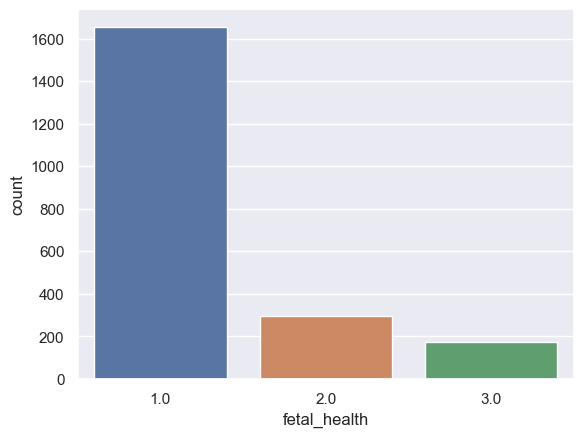

In [2]:
sns.set()
sns.countplot(data=df, x='fetal_health')

In [3]:
df['fetal_health'].value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

Hence we can observer the imbalance class

In [4]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [5]:
df.duplicated().sum()

13

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.duplicated().sum()

0

In [8]:
df.shape

(2113, 22)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2113 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2113 non-null   float64
 1   accelerations                                           2113 non-null   float64
 2   fetal_movement                                          2113 non-null   float64
 3   uterine_contractions                                    2113 non-null   float64
 4   light_decelerations                                     2113 non-null   float64
 5   severe_decelerations                                    2113 non-null   float64
 6   prolongued_decelerations                                2113 non-null   float64
 7   abnormal_short_term_variability                         2113 non-null   float64
 8   mean_value_of_short_term_variability  

Here all data is numerical 

# Oversampling of dataset

In [11]:
from sklearn.utils import resample
df_majority = df[df['fetal_health'] == 1.0]
df_minority1 = df[df['fetal_health'] == 2.0]
df_minority2 = df[df['fetal_health'] == 3.0]

# Upsample minority classes
df_minority1_upsampled = resample(df_minority1,
                                  replace=True,
                                  n_samples=1646,
                                  random_state=42)

df_minority2_upsampled = resample(df_minority2,
                                  replace=True,
                                  n_samples=1646,
                                  random_state=42)

df_upsampled = pd.concat([df_minority1_upsampled, df_minority2_upsampled, df_majority])
df_upsampled = df_upsampled.sample(frac=1, random_state=42).reset_index(drop=True)

<Axes: xlabel='fetal_health', ylabel='count'>

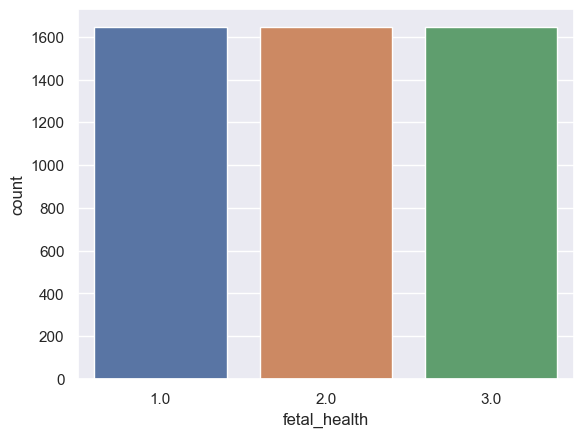

In [12]:
sns.set()
sns.countplot(data= df_upsampled, x='fetal_health')

In [13]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()
categorical_columns = df.columns
for column in categorical_columns:
    df[column] = le.fit_transform(df[column])

In [14]:
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,9,0,0,0,0,0,0,61,3,43,...,12,3,2,0,34,62,36,71,2,1
1,21,6,0,6,3,0,0,5,19,0,...,18,75,6,1,55,61,55,12,1,0
2,22,3,0,8,3,0,0,4,19,0,...,18,75,5,1,55,60,53,13,1,0
3,23,3,0,8,3,0,0,4,22,0,...,3,47,11,0,51,59,52,13,2,0
4,21,7,0,8,0,0,0,4,22,0,...,3,47,9,0,51,61,53,11,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,29,0,0,7,0,0,0,67,0,25,...,87,54,4,0,67,75,67,2,1,1
2122,29,1,0,7,0,0,0,66,2,22,...,53,46,6,0,66,73,66,3,2,1
2123,29,1,0,7,0,0,0,67,2,20,...,53,47,5,0,67,73,67,4,2,1
2124,29,1,0,6,0,0,0,66,2,27,...,53,46,6,0,66,72,66,4,2,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2113 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype
---  ------                                                  --------------  -----
 0   baseline value                                          2113 non-null   int64
 1   accelerations                                           2113 non-null   int64
 2   fetal_movement                                          2113 non-null   int64
 3   uterine_contractions                                    2113 non-null   int64
 4   light_decelerations                                     2113 non-null   int64
 5   severe_decelerations                                    2113 non-null   int64
 6   prolongued_decelerations                                2113 non-null   int64
 7   abnormal_short_term_variability                         2113 non-null   int64
 8   mean_value_of_short_term_variability                    21

# Data Splitting

In [16]:
X = df.drop('fetal_health', axis=1).values  # Features
Y = df['fetal_health'].values  # Target variable

In [17]:
Y

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
scalar = RobustScaler()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [20]:
X_train_scaled = scalar.fit_transform(X_train)

In [21]:
Y_test_scaled = scalar.fit_transform(X_test)

In [22]:
X_train.shape

(1584, 21)

# Linear Models

Here we will use two linear models 

# Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

lr = LogisticRegression()  
lr.fit(X_train,y_train)
y_predict = lr.predict(X_test)
mse = mean_squared_error(y_test,y_predict)
print(mse)
print (lr.score(X_train,y_train))
print (lr.score(X_test,y_test))

0.10396975425330812
0.8914141414141414
0.9130434782608695


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
lr2=LogisticRegression(C=.111,penalty='l1',solver='liblinear')
lr2.fit(X_train,y_train)
y_predict = lr2.predict(X_test)
mse = mean_squared_error(y_test,y_predict)
print(mse)
print (lr2.score(X_train,y_train))
print (lr2.score(X_test,y_test))

0.10964083175803403
0.8920454545454546
0.9187145557655955


underfitting in both

# Support Vector Machine(SVM)

In [25]:
from sklearn.svm import SVC
SVC1= SVC(C=0.1, kernel='rbf')
SVC1.fit(X_train,y_train)
print(SVC1.score(X_train,y_train))
print(SVC1.score(X_test,y_test))

0.797979797979798
0.8204158790170132


It showing underfitting

In [26]:
SVC2= SVC(C=1, kernel='rbf')
SVC2.fit(X_train,y_train)
print(SVC2.score(X_train,y_train))
print(SVC2.score(X_test,y_test))

0.88510101010101
0.9035916824196597


Here we can still observe the underfitting

# Non-linear Models

From above two linear models the dataset was underfit, now we will use different non-linear models

# Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=6 , max_features=22)
rf.fit(X_train,y_train)
print(rf.score(X_train,y_train))
print(rf.score(X_test,y_test))

0.9608585858585859
0.947069943289225


<Axes: >

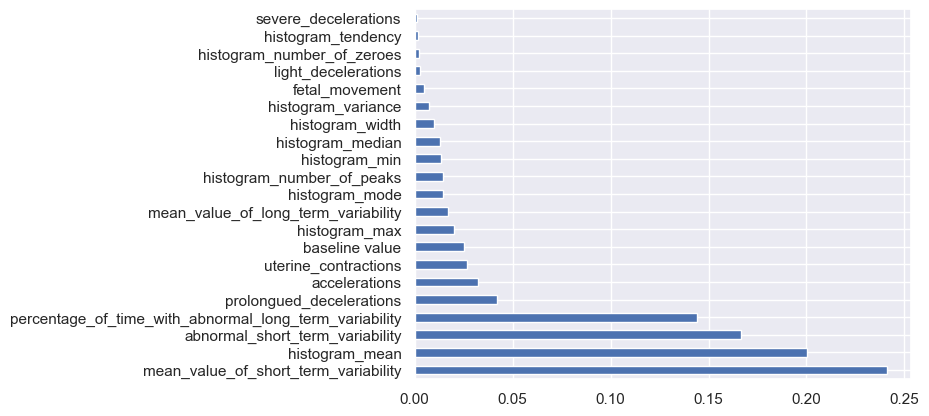

In [30]:
feat_importances = pd.Series(rf.feature_importances_, index=df.columns[:-1])
feat_importances.nlargest(22).plot(kind='barh')

# GridSearchCV

In [31]:
from sklearn.model_selection import GridSearchCV

In [34]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(best_params)
best_rf = grid_search.best_estimator_
print(best_rf)
(best_rf.score(X_train, y_train))

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


{'bootstrap': False, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
RandomForestClassifier(bootstrap=False, max_depth=20, max_features='auto',
                       n_estimators=300)


0.9993686868686869

# Making the model using Grid params

In [42]:
param_grid = {
    'bootstrap': False,
    'max_depth': 20,
    'max_features': 'auto',
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 300
}
rf_classifier = RandomForestClassifier(**param_grid)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
print(rf_classifier.score(X_train,y_train))
print(rf_classifier.score(X_test,y_test))

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.9993686868686869
0.9659735349716446


# Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
dt = DecisionTreeClassifier(max_depth =6, max_features= 22)
dt.fit(X_train , y_train)
print (dt.score(X_train , y_train))
print (dt.score(X_test , y_test))

0.9577020202020202
0.947069943289225


In [41]:
param_grid = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_dt = grid_search.best_estimator_
best_params

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 2,
 'min_samples_split': 5}

In [44]:
param_grid = {
    'criterion': 'gini',
    'max_depth': 7,
    'min_samples_leaf': 2,
    'min_samples_split': 5
}
dt_classifier = DecisionTreeClassifier(**param_grid)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
print (dt_classifier.score(X_train , y_train))
print (dt_classifier.score(X_test , y_test))

0.961489898989899
0.9376181474480151


<Axes: >

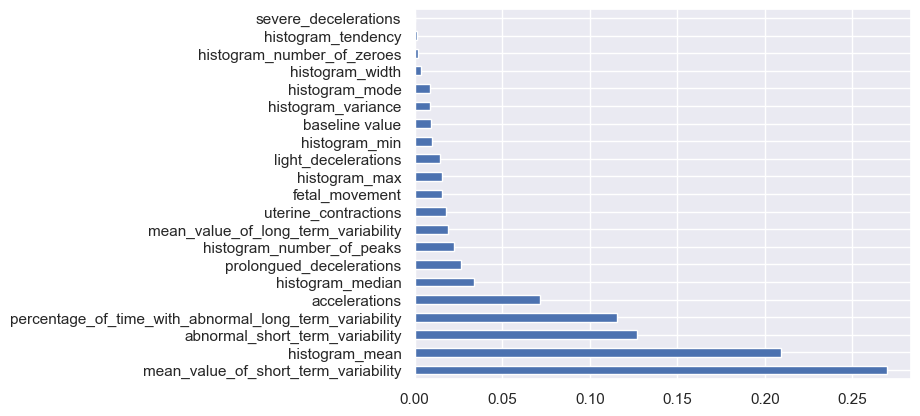

In [46]:
feat_importances = pd.Series(dt_classifier.feature_importances_, index=df.columns[:-1])
feat_importances.nlargest(22).plot(kind='barh')

# XGBoost Classifier

In [48]:
pip install xgboost

     -------------------------------------- 99.7/99.7 MB 495.5 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [49]:
from xgboost import XGBClassifier 
xgb= XGBClassifier(n_estimators=100,max_depth=3,learning_rate=.1)
xgb.fit(X_train , y_train)
print (xgb.score(X_train , y_train))
print (xgb.score(X_test , y_test))

0.9835858585858586
0.9640831758034026


In [50]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_xgb = grid_search.best_estimator_
best_xgb.score(X_train, y_train)
best_params

{'colsample_bytree': 1.0,
 'learning_rate': 0.2,
 'max_depth': 3,
 'n_estimators': 300,
 'subsample': 0.8}

In [51]:
best_params = {
    'n_estimators': 200,
    'max_depth': 5,
    'learning_rate': 0.1,
    'subsample': 0.9,
    'colsample_bytree': 0.9
}
best_xgb = XGBClassifier(**best_params)
best_xgb.fit(X_train, y_train)

y_pred_xgb = best_xgb.predict(X_test)
print (best_xgb.score(X_train , y_train))
print (best_xgb.score(X_test , y_test))

0.9993686868686869
0.9659735349716446


# Evaluating

In [52]:
from sklearn.metrics import confusion_matrix , classification_report
predictions = xgb.predict(X_test)
predictions
con = confusion_matrix(y_test,predictions)
con

array([[414,   4,   2],
       [ 11,  60,   2],
       [  0,   0,  36]], dtype=int64)

In [54]:
pip install mlxtend

     ---------------------------------------- 1.4/1.4 MB 1.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


              precision    recall  f1-score   support

           0       0.97      0.99      0.98       420
           1       0.94      0.82      0.88        73
           2       0.90      1.00      0.95        36

    accuracy                           0.96       529
   macro avg       0.94      0.94      0.93       529
weighted avg       0.96      0.96      0.96       529

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       420
           1       0.94      0.82      0.88        73
           2       0.92      1.00      0.96        36

    accuracy                           0.97       529
   macro avg       0.94      0.94      0.94       529
weighted avg       0.97      0.97      0.97       529



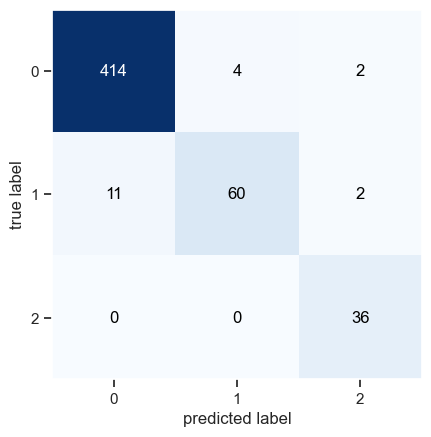

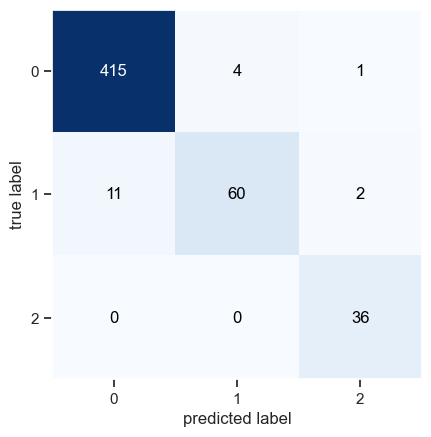

In [55]:
from mlxtend.plotting import plot_confusion_matrix 
plot_confusion_matrix(con)
print(classification_report(y_test,predictions))
con = confusion_matrix(y_test,y_pred_xgb)
plot_confusion_matrix(con)
print(classification_report(y_test,y_pred_xgb))

# KNN

In [56]:
from sklearn.neighbors import KNeighborsClassifier

param_grid_knn = {
    'n_neighbors': [1, 3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  
}

knn_classifier = KNeighborsClassifier()
grid_search_knn = GridSearchCV(estimator=knn_classifier, param_grid=param_grid_knn, scoring='accuracy', cv=5)
grid_search_knn.fit(X_train, y_train)
best_params_knn = grid_search_knn.best_params_
best_score_knn = grid_search_knn.best_score_
best_knn = grid_search_knn.best_estimator_

print("Best Hyperparameters for k-NN:", best_params_knn)
print("Best Score for k-NN:", best_score_knn)


Best Hyperparameters for k-NN: {'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
Best Score for k-NN: 0.9059397835722557


In [60]:
best_param = {
    'n_neighbors': 1,
    'weights': 'uniform',
    'p': 1  
}
best_knn = KNeighborsClassifier(**best_param)
best_knn.fit(X_train, y_train)

y_pred_knn = best_knn.predict(X_test)
print (best_knn.score(X_train , y_train))
print (best_knn.score(X_test , y_test))


0.9993686868686869
0.9206049149338374


# Adaboost

In [61]:
from sklearn.ensemble import AdaBoostClassifier

base_estimator = RandomForestClassifier(n_estimators=50)  
ada = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=5, learning_rate=0.1)
ada.fit(X_train , y_train)
print (ada.score(X_train , y_train))
print (ada.score(X_test , y_test))

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.9993686868686869
0.9621928166351607


              precision    recall  f1-score   support

           0       0.97      0.99      0.98       420
           1       0.94      0.79      0.86        73
           2       0.92      1.00      0.96        36

    accuracy                           0.96       529
   macro avg       0.94      0.93      0.93       529
weighted avg       0.96      0.96      0.96       529



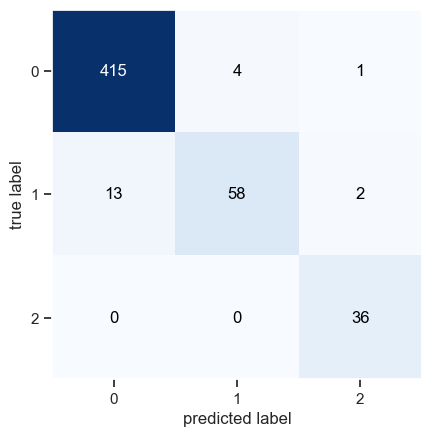

In [62]:
con1 = confusion_matrix(y_test,ada.predict(X_test))
con1
plot_confusion_matrix(con1)
print(classification_report(y_test,ada.predict(X_test)))

# Voting

In [63]:
from sklearn.ensemble import VotingClassifier
clf1= LogisticRegression()
clf2= AdaBoostClassifier(base_estimator=base_estimator, n_estimators=5, learning_rate=0.1)
clf3= XGBClassifier(n_estimators=5,max_depth=4,learning_rate=.1)
v_clf=VotingClassifier(estimators=[("LOG",clf1),("Ada",clf2),('xgb',clf3)],voting='hard')
v_clf.fit(X_train , y_train)
print (v_clf.score(X_train , y_train))
print (v_clf.score(X_test , y_test))

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.9696969696969697
0.9603024574669187


In [64]:
v_clf=VotingClassifier(estimators=[("LOG",clf1),("Ada",clf2),('xgb',clf3)],voting='soft')
v_clf.fit(X_train , y_train)
print (v_clf.score(X_train , y_train))
print (v_clf.score(X_test , y_test))
print(classification_report(y_test,v_clf.predict(X_test)))

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.9797979797979798
0.9527410207939508
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       420
           1       0.93      0.74      0.82        73
           2       0.95      0.97      0.96        36

    accuracy                           0.95       529
   macro avg       0.94      0.90      0.92       529
weighted avg       0.95      0.95      0.95       529



# Cross Validation for xgb_best

In [65]:
from sklearn.model_selection import KFold , cross_val_score
K_fold= KFold(n_splits=10 , shuffle=True , random_state=42)
scoring='accuracy'
score=cross_val_score(best_xgb,X,Y,cv=K_fold,scoring=scoring)
print(score)
round(np.mean(score)*100,2)

[0.95754717 0.97169811 0.95754717 0.96208531 0.96208531 0.91943128
 0.98578199 0.96682464 0.95260664 0.93838863]


95.74

# Conclusion

Our project has achieved notable results, there is always room for improvement.Throughout our analysis, we compared the performance of different models using various evaluation metrics, including accuracy, confusion matrices, and classification reports. This allowed us to identify the most suitable models for fetal health classification.